
# Data Cleaning, Data Preprocessing, EDA

In [41]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from imblearn.under_sampling import RandomUnderSampler


In [42]:
# #Importing  files
df_test=pd.read_csv('C:/Users/gabri/Dropbox/Gaby/Proyectos/My_Portafolio/FraudDetectionCards/Data/fraud_Test.csv')
# df_test=pd.read_csv('https://www.dropbox.com/scl/fi/k3nxi8yh0pj5uewmnqihy/fraud_Test.csv?rlkey=syq7whlu2im1wosxins25opgt&dl=1')
df_test["Split"]="Test"

df_train=pd.read_csv('C:/Users/gabri/Dropbox/Gaby/Proyectos/My_Portafolio/FraudDetectionCards/Data/fraud_Train.csv')
# df_train=pd.read_csv("https://www.dropbox.com/scl/fi/xf2e4gupvr7b2pa3wm9eu/fraud_Train.csv?rlkey=jydnzf9guigkqbnsgkr6g9t0j&dl=1")
df_train["Split"]="Test"

df_all=pd.concat([df_test,df_train]).reset_index()

## Data Cleaning

- Since this is simulated data the dataset is cleaner than real life data. 
- There are no missing values in either train or test set

In [43]:
# Handling outliers:Flooring and caping

# IQR
df_all['amt']=df_all['amt'].astype("float")

# Calculate the upper and lower limits
P1 = df_all['amt'].quantile(0.01)
P99 = df_all['amt'].quantile(0.99)
IQR = P99 - P1
lower = P1 - 1.5*IQR
upper = P99 + 1.5*IQR
 
# Create arrays of Boolean flags indicating the outlier rows
upper_array = np.where(df_all['amt'] >= upper)[0]
lower_array = np.where(df_all['amt'] <= lower)[0]
 
# Removing the outliers
df_all=df_all.drop(index=upper_array)
df_all=df_all.drop(index=lower_array)

df_all=df_all.reset_index().drop(columns=['index', 'Unnamed: 0','level_0'])

## Data Preprocessing

In [44]:
#gender
df_all["gender_is_fem"]=np.where(df_all["gender"]=='F',1,0)

#merchant category
enc = preprocessing.OneHotEncoder()
encoded_data = enc.fit_transform(df_all[["category"]]).toarray()
encoded_df = pd.DataFrame(encoded_data, columns=enc.get_feature_names_out(["category"]))
df_all = pd.concat([df_all, encoded_df], axis=1)

# Change Date format and split date into just month, day and year
df_all["trans_date_trans_time"]=pd.to_datetime(df_all["trans_date_trans_time"])
df_all['trans_date_trans_time_month'] = df_all['trans_date_trans_time'].dt.month
df_all['trans_date_trans_time_year'] = df_all['trans_date_trans_time'].dt.year
df_all['trans_date_trans_time_day'] = df_all['trans_date_trans_time'].dt.day
df_all['trans_date_trans_time_hour'] = df_all['trans_date_trans_time'].dt.hour

# Change format of DOB and get year, month and day
df_all["dob"]=pd.to_datetime(df_all["dob"])
df_all['dob_month'] = df_all['dob'].dt.month
df_all['dob_year'] = df_all['dob'].dt.year
df_all['dob_day'] = df_all['dob'].dt.day

# age of card holder calculation
df_all["age"]=round(df_all["trans_date_trans_time_year"]-df_all["dob_year"])



## EDA

In [45]:
# df_all=df_all_resampled.copy() #uncomment and rerun notebook without deleting the variables to check the resampled data

In [46]:
df_all.groupby(["is_fraud"]).agg({"cc_num":"count"})
# only 9k from 1.8m transactions are fraud


,cc_num
is_fraud,
0,1840335
1,9649


In [47]:
df_all.groupby(["is_fraud","gender"]).agg({"cc_num":"count"})
# there is a similar number of fraud cases by gender

cc_num
is_fraud gender         
0        F       1008467
         M        831868
1        F          4898
         M          4751

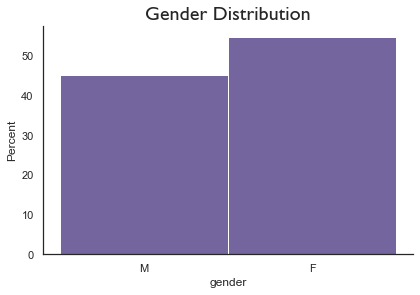

In [48]:
sns.set( style = "white" ) 
sns.set_palette("viridis")
sns.displot(data=df_all,x="gender", kind="hist", height=4, aspect=1.5,stat="percent")
plt.title('Gender Distribution', fontdict={'fontsize': 20,'fontname':"Gill Sans MT"})
plt.show()

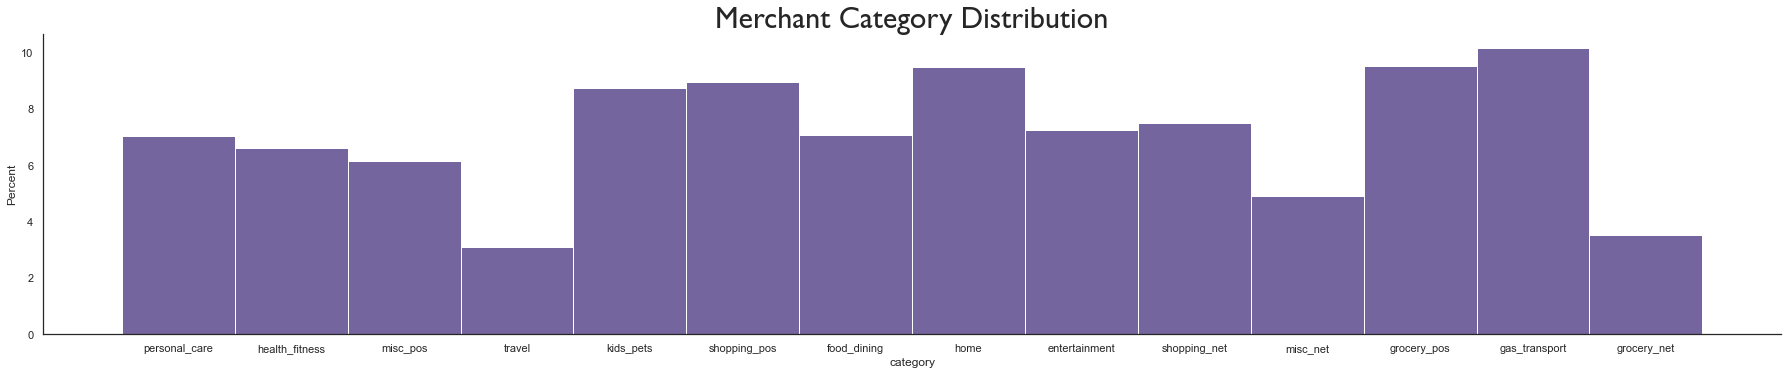

In [49]:
sns.displot(data=df_all,x="category", kind="hist", height=5, aspect=5,stat="percent")
plt.title('Merchant Category Distribution', fontdict={'fontsize': 30,'fontname':"Gill Sans MT"})
plt.show()

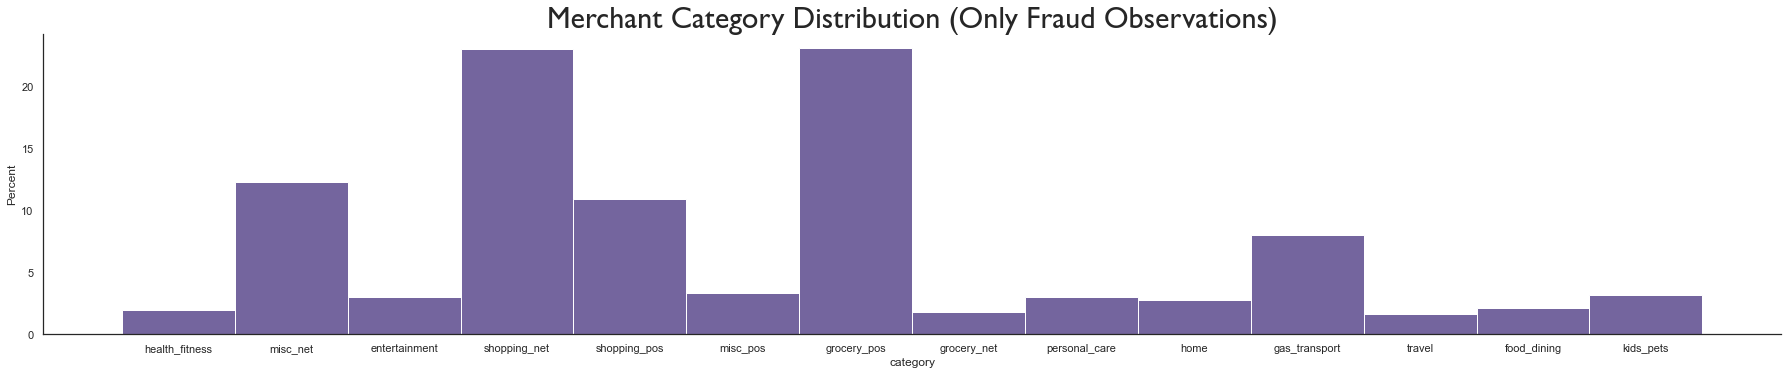

In [50]:
sns.displot(data=df_all[df_all["is_fraud"]==1],x="category", kind="hist", height=5, aspect=5,stat="percent")
plt.title('Merchant Category Distribution (Only Fraud Observations)', fontdict={'fontsize': 30,'fontname':"Gill Sans MT"})
plt.show()

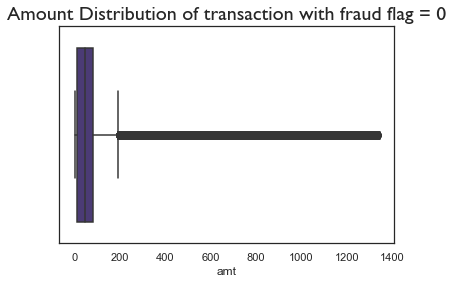

In [51]:
sns.boxplot(data=df_all[df_all["is_fraud"]==0],x="amt", orient="h")
plt.title('Amount Distribution of transaction with fraud flag = 0', fontdict={'fontsize': 20,'fontname':"Gill Sans MT"})
plt.show()

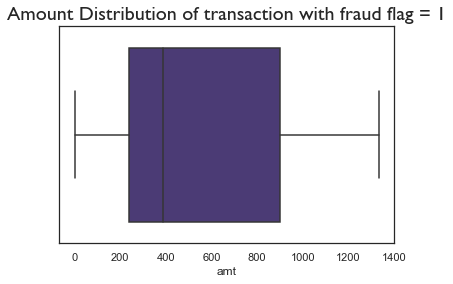

In [52]:
sns.boxplot(data=df_all[df_all["is_fraud"]==1],x="amt", orient="h")
plt.title('Amount Distribution of transaction with fraud flag = 1', fontdict={'fontsize': 20,'fontname':"Gill Sans MT"})
plt.show()

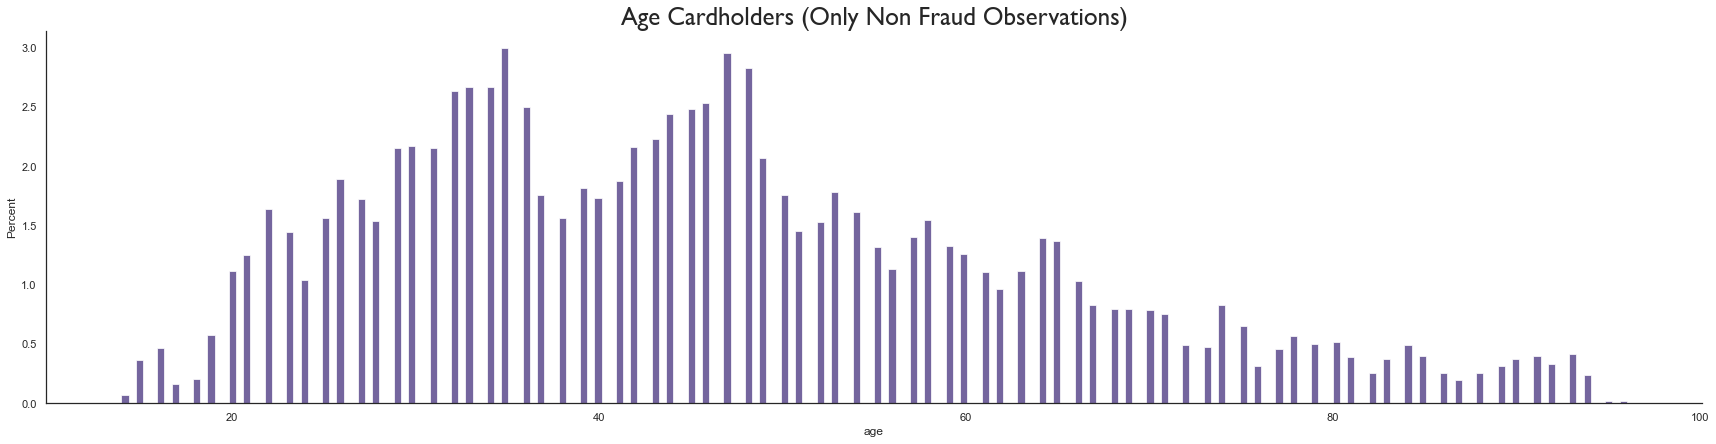

In [53]:
sns.displot(data=df_all[df_all["is_fraud"]==0],x="age", kind="hist", height=6, aspect=4,stat="percent")
plt.title('Age Cardholders (Only Non Fraud Observations)', fontdict={'fontsize': 25,'fontname':"Gill Sans MT"})
plt.show()

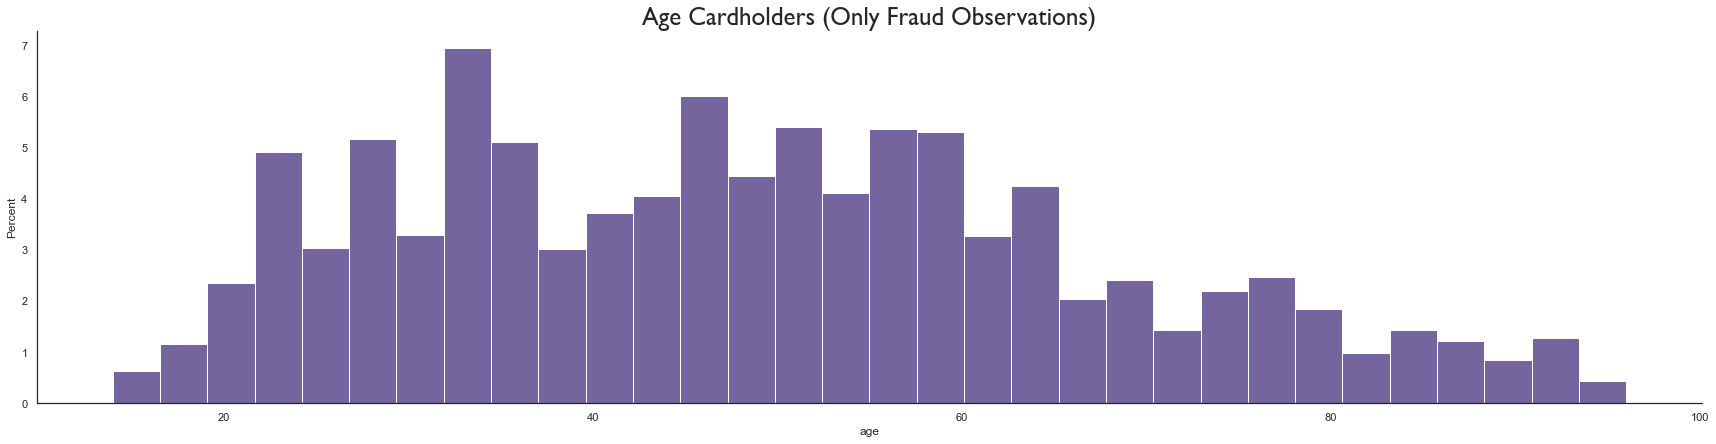

In [54]:
sns.displot(data=df_all[df_all["is_fraud"]==1],x="age", kind="hist", height=6, aspect=4,stat="percent")
plt.title('Age Cardholders (Only Fraud Observations)', fontdict={'fontsize': 25,'fontname':"Gill Sans MT"})
plt.show()

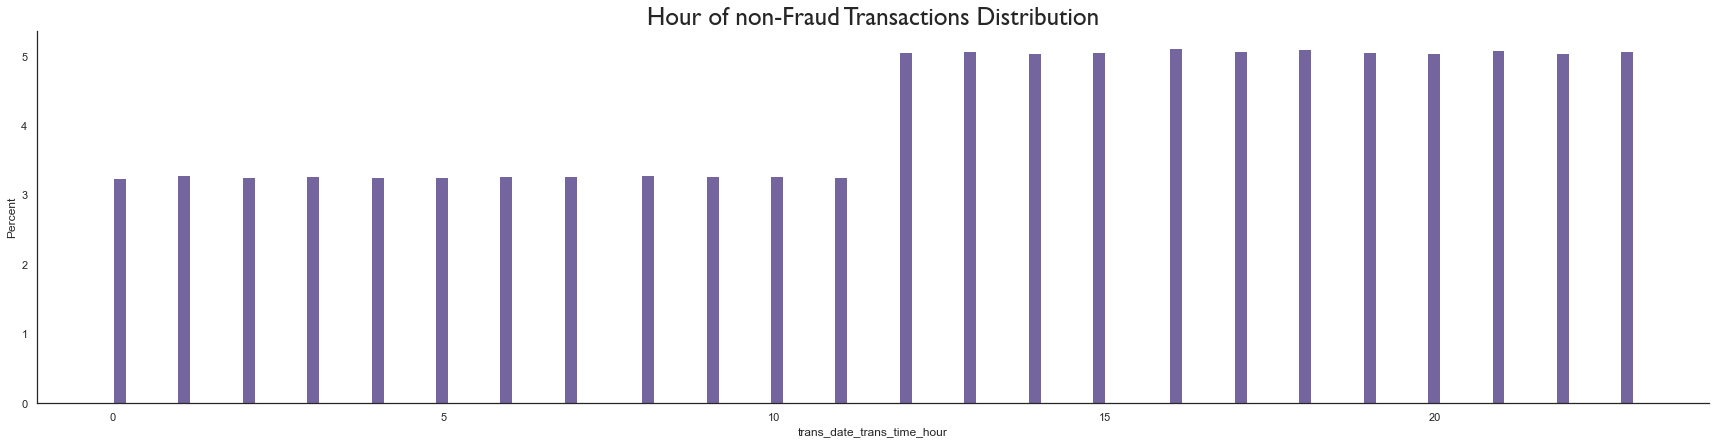

In [55]:
sns.displot(data=df_all[df_all["is_fraud"]==0],x="trans_date_trans_time_hour", kind="hist", height=6, aspect=4,stat="percent")
plt.title('Hour of non-Fraud Transactions Distribution', fontdict={'fontsize': 25,'fontname':"Gill Sans MT"})
plt.show()

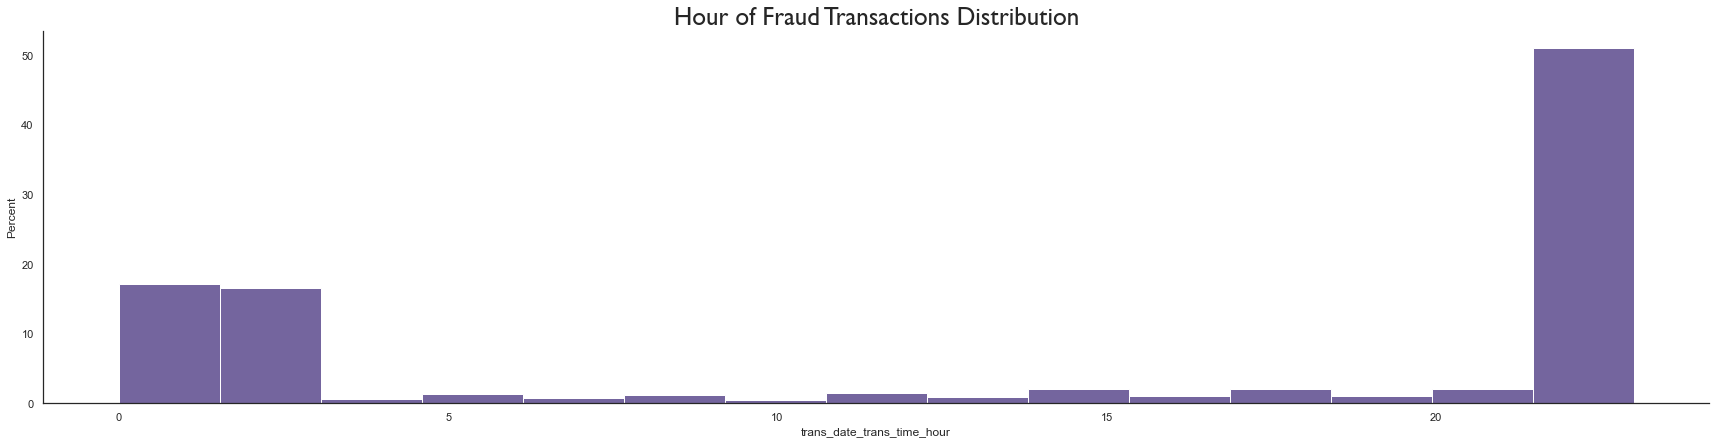

In [56]:
sns.displot(data=df_all[df_all["is_fraud"]==1],x="trans_date_trans_time_hour", kind="hist", height=6, aspect=4,stat="percent")
plt.title('Hour of Fraud Transactions Distribution', fontdict={'fontsize': 25,'fontname':"Gill Sans MT"})
plt.show()


## Handling Imbalanced Data

The main problem with imbalanced dataset prediction is how accurately we predict both majority and minority classes.

Just 0.52% of the transactions have a fraud flag.

To control we'll apply undersampling and specific evaluation metrics.

In [57]:
# Create a RandomUnderSampler object
rus = RandomUnderSampler(random_state=1994, sampling_strategy = 'auto')

# Balancing the data
df_all_resampled_x,df_all_resampled_y = rus.fit_resample(df_all.drop(columns=["is_fraud"]),df_all["is_fraud"])
df_all_resampled=pd.concat([df_all_resampled_x,df_all_resampled_y],axis=1).reset_index()

In [58]:
df_all_resampled.groupby(["is_fraud"]).agg({"cc_num":"count"})

,cc_num
is_fraud,
0,9649
1,9649


In [59]:
df_all_resampled.groupby(["is_fraud","gender"]).agg({"cc_num":"count"})

cc_num
is_fraud gender        
0        F         5301
         M         4348
1        F         4898
         M         4751

In [60]:
#to be used in modelling and evaluation notebook
df_all_resampled.to_csv('C:/Users/gabri/Dropbox/Gaby/Proyectos/My_Portafolio/FraudDetectionCards/Data/fraud_resampled1.csv')